# Part 1

### Imports for Part 1

In [540]:
from copy import deepcopy

### 1a and 1b: Function to estimate emission params using MLE

In [541]:
# Get emission counts from a given file list
def get_emission_counts (file):
    emission_count = {} # Stores the count of tag corresponding to each work
    # Returns a dict of format {'Word1':{'O':count,'B-positive':count, ...}, 'Word2':{'O':count,'B-positive':count, ...}, ... }
    tag_count = {'O':0,'B-positive':0,'B-neutral':0,'B-negative':0,'I-positive':0,'I-neutral':0,'I-negative':0} # Stores the total count of each tag
    new_count = {'O':0,'B-positive':0,'B-neutral':0,'B-negative':0,'I-positive':0,'I-neutral':0,'I-negative':0} # Stores the counts for each line
    for line in file:   # [Word Tag\n] 
        if line != "\n":
            wordlist = line.split(" ")  # ["Word","Tag\n"] 
       
            word = ''.join([_ for _ in wordlist[:-1]])  # "Word"
            tag = wordlist[-1].strip() # Remove trailing \n  # "Tag"
            if word not in emission_count:
                emission_count[word] = deepcopy(new_count)
            emission_count[word][tag] += 1
            tag_count[tag] += 1
    return emission_count, tag_count

# Estimate the emission parameters using the given formula.
# k is used to include words not appearing in the training set.
def estimate_emission_params (file, k):
    emission_count, tag_count = get_emission_counts(file)
    emission_params = {}
    # Returns a dict of format {'Word1':{'O':param,'B-positive':param, ...}, 'Word2':{'O':param,'B-positive':param, ...}, ... }
    tag_prob = {'O':0,'B-positive':0,'B-neutral':0,'B-negative':0,'I-positive':0,'I-neutral':0,'I-negative':0} # Stores the tag probability of each word
    emission_params["#UNK#"] = deepcopy(tag_prob)
    for tag in tag_count.keys():
        den = tag_count[tag] + k
        for word in emission_count.keys():
            if word not in emission_params:
                emission_params[word] = deepcopy(tag_prob)
            num = 0
            num += emission_count[word][tag]
            emission_params[word][tag] = num/den
        emission_params["#UNK#"][tag] = k/den
    return emission_params

# Using the emission params obtained, perform simple sentiment analysis, returning a list containing the predicted outputs
def sentiment_analysis(file, emission_params):
    lines = []  # List containing "Word Tag\n"
    for line in file:
        add = ""
        word = line.strip()
        if line != "\n":
            if word not in emission_params:
                assigned_tag = max(emission_params["#UNK#"],key=emission_params["#UNK#"].get)
            else:
                assigned_tag = max(emission_params[word],key=emission_params[word].get)
            add = word + " " + assigned_tag
        lines.append(add)
    return lines


### Getting emission params

In [542]:

# Reading lines from files
with open('Data/ES/train', 'r', encoding="utf-8") as f:
    ES_train = f.readlines()
with open('Data/ES/dev.in', 'r', encoding="utf-8") as f:
    ES_devin = f.readlines()
with open('Data/ES/dev.out', 'r', encoding="utf-8") as f:
    ES_devout = f.readlines()
with open('Data/RU/train', 'r', encoding="utf-8") as f:
    RU_train = f.readlines()
with open('Data/RU/dev.in', 'r', encoding="utf-8") as f:
    RU_devin = f.readlines()
with open('Data/RU/dev.out', 'r', encoding="utf-8") as f:
    RU_devout = f.readlines()

# Estimating Emission Params
ES_train_emission_params = estimate_emission_params (ES_train,1)
RU_train_emission_params = estimate_emission_params (RU_train,1)


emission_count, tag_count = get_emission_counts(ES_train)
print(emission_count[":"])
print(tag_count)
print(ES_train_emission_params[":"])
print(RU_train_emission_params)

{'O': 68, 'B-positive': 0, 'B-neutral': 0, 'B-negative': 0, 'I-positive': 0, 'I-neutral': 0, 'I-negative': 0}
{'O': 29035, 'B-positive': 1160, 'B-neutral': 72, 'B-negative': 381, 'I-positive': 314, 'I-neutral': 43, 'I-negative': 171}
{'O': 0.00234192037470726, 'B-positive': 0.0, 'B-neutral': 0.0, 'B-negative': 0.0, 'I-positive': 0.0, 'I-neutral': 0.0, 'I-negative': 0.0}
{'#UNK#': {'O': 2.467490808596738e-05, 'B-positive': 0.0005382131324004305, 'B-neutral': 0.004807692307692308, 'B-negative': 0.0022471910112359553, 'I-positive': 0.0016722408026755853, 'I-neutral': 0.014492753623188406, 'I-negative': 0.007042253521126761}, 'Еда': {'O': 2.467490808596738e-05, 'B-positive': 0.007534983853606028, 'B-neutral': 0.009615384615384616, 'B-negative': 0.0044943820224719105, 'I-positive': 0.0, 'I-neutral': 0.0, 'I-negative': 0.0}, 'вкусная': {'O': 0.0008882966910948257, 'B-positive': 0.0, 'B-neutral': 0.0, 'B-negative': 0.0, 'I-positive': 0.0, 'I-neutral': 0.0, 'I-negative': 0.0}, ',': {'O': 0.091

### Performing Sentiment Analysis and Writing to files

In [543]:
# Performing Sentiment analysis, returning lists of lines to be added
ES_devout_lines = sentiment_analysis(ES_devin,ES_train_emission_params)
RU_devout_lines = sentiment_analysis(RU_devin,RU_train_emission_params)

# Writing to Files
with open('Data/RU/dev.p1.out', 'w', encoding="utf-8") as f:
   f.write('\n'.join(RU_devout_lines))

with open('Data/ES/dev.p1.out', 'w', encoding="utf-8") as f:
   f.write('\n'.join(ES_devout_lines))

### Obtaining precision, recall, and F scores

In [544]:
# Reading lines from dev.p1.out files
with open('Data/ES/dev.p1.out', 'r', encoding="utf-8") as f:
    ES_p1_devout = f.readlines()
with open('Data/RU/dev.p1.out', 'r', encoding="utf-8") as f:
    RU_p1_devout = f.readlines()

a,b = get_emission_counts(ES_p1_devout)


# We then run the eval script provided to obtain the different scores

In [545]:
import subprocess
import os

output_es_p1 = os.path.join("Data", "ES", "dev.p1.out")
output_ru_p1 = os.path.join("Data", "RU", "dev.p1.out")
output_es = os.path.join("Data", "ES", "dev.out")
output_ru = os.path.join("Data", "RU", "dev.out")
evalresult = os.path.join("projet", "evalResult.py")

command = [
    "python",
    f"{evalresult}",
    f"{output_ru}",
    f"{output_ru_p1}",
]
command1 = [
    "python",
    f"{evalresult}",
    f"{output_es}",
    f"{output_es_p1}",
]

result = subprocess.run(command, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
result1 = subprocess.run(command1, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)

print('RU:\n' + result.stdout)
print('ES:\n' + result1.stdout)
if result.stderr:
    print("Error:", result.stderr)
if result.stderr:
    print("Error:", result1.stderr)

RU:

#Entity in gold data: 389
#Entity in prediction: 1816

#Correct Entity : 266
Entity  precision: 0.1465
Entity  recall: 0.6838
Entity  F: 0.2413

#Correct Sentiment : 129
Sentiment  precision: 0.0710
Sentiment  recall: 0.3316
Sentiment  F: 0.1170

ES:

#Entity in gold data: 229
#Entity in prediction: 1466

#Correct Entity : 178
Entity  precision: 0.1214
Entity  recall: 0.7773
Entity  F: 0.2100

#Correct Sentiment : 97
Sentiment  precision: 0.0662
Sentiment  recall: 0.4236
Sentiment  F: 0.1145



### Q2
    

In [546]:
import pandas as pd 
import numpy as np

In [547]:
def estimate_transition_parameters(training_data):
    tag_transition_count = {}
    tag_count = {}

    previous_tag = "START"
    for line in training_data + ['\n']:  # Adding an extra newline to process the last sentence
        if line.strip() == '':
            # Handle end of sentence
            tag_transition_count[(previous_tag, "END")] = tag_transition_count.get((previous_tag, "END"), 0) + 1
            tag_count["END"] = tag_count.get("END", 0) + 1
            previous_tag = "START"
        else:
            tag = line.split(' ')[-1]
            tag = tag.strip()
            tag_transition_count[(previous_tag, tag)] = tag_transition_count.get((previous_tag, tag), 0) + 1
            tag_count[previous_tag] = tag_count.get(previous_tag, 0) + 1
            previous_tag = tag

    tag_count["START"] = len([line for line in training_data if line.strip() == '']) + 1

    transition_parameters = {}
    for (prev_tag, tag), count in tag_transition_count.items():
        transition_parameters[(prev_tag, tag)] = 0 if tag_count[prev_tag] == 0 else count / tag_count[prev_tag]

    return transition_parameters


In [548]:
def normalize_emission_params(emission_params):
    normalized_params = {}
    for word, tag_probs in emission_params.items():
        total_prob = sum(tag_probs.values())
        normalized_params[word] = {tag: prob / total_prob for tag, prob in tag_probs.items()}
    return normalized_params

In [549]:
def normalize_transition_params(transition_params):
    tag_sums = {}
    
    # Calculate the sum for each starting tag
    for (prev_tag, _), prob in transition_params.items():
        tag_sums[prev_tag] = tag_sums.get(prev_tag, 0) + prob

    # Divide each transition probability by the corresponding sum
    normalized_params = {(prev_tag, tag): prob / tag_sums[prev_tag] for (prev_tag, tag), prob in transition_params.items()}

    return normalized_params

In [550]:
ES_train_transition_params= estimate_transition_parameters (ES_train)
RU_train_transition_params = estimate_transition_parameters (RU_train)
# print(ES_train_transition_params)
print(RU_train_emission_params)
print(RU_train_transition_params)
print(normalize_emission_params(RU_train_emission_params))

{'#UNK#': {'O': 2.467490808596738e-05, 'B-positive': 0.0005382131324004305, 'B-neutral': 0.004807692307692308, 'B-negative': 0.0022471910112359553, 'I-positive': 0.0016722408026755853, 'I-neutral': 0.014492753623188406, 'I-negative': 0.007042253521126761}, 'Еда': {'O': 2.467490808596738e-05, 'B-positive': 0.007534983853606028, 'B-neutral': 0.009615384615384616, 'B-negative': 0.0044943820224719105, 'I-positive': 0.0, 'I-neutral': 0.0, 'I-negative': 0.0}, 'вкусная': {'O': 0.0008882966910948257, 'B-positive': 0.0, 'B-neutral': 0.0, 'B-negative': 0.0, 'I-positive': 0.0, 'I-neutral': 0.0, 'I-negative': 0.0}, ',': {'O': 0.09179065807979865, 'B-positive': 0.0, 'B-neutral': 0.0, 'B-negative': 0.0, 'I-positive': 0.008361204013377926, 'I-neutral': 0.057971014492753624, 'I-negative': 0.014084507042253521}, 'но': {'O': 0.007427147333876181, 'B-positive': 0.0, 'B-neutral': 0.0, 'B-negative': 0.0, 'I-positive': 0.0, 'I-neutral': 0.0, 'I-negative': 0.0}, 'отдельно': {'O': 0.0002467490808596738, 'B-po

In [551]:
# print(ES_devin)
# print(ES_train_transition_params)
# print(RU_train_transition_params)
# print(ES_train_emission_params)
# print(RU_train_emission_params)


In [552]:
def viterbi(words, emission_params, transition_params):
    all_best_tags = []
    sentence = []
    for word in words + ['\n']:  # Adding an extra newline to process the last sentence
        if word.strip() == '':  # Sentence separator
            if sentence:  # If there are words in the sentence
                tags = list(emission_params["#UNK#"].keys())
                n = len(sentence)

                viterbi_matrix = [{tag: 0 for tag in tags} for _ in range(n+1)]  # Add 1 for START
                backpointers = [{tag: None for tag in tags} for _ in range(n+1)]

                # Initialization step (t=0)
                for tag in tags:
                    viterbi_matrix[0][tag] = transition_params.get(("START", tag), 0) * emission_params.get(sentence[0].strip(), emission_params["#UNK#"]).get(tag, 0)

                # Recursion step (t > 0)
                for t in range(1, n):
                    for tag in tags:
                        emission_prob = emission_params.get(sentence[t].strip(), emission_params["#UNK#"]).get(tag, 0)
                        max_score, prev_tag = max(
                            [(viterbi_matrix[t-1][prev_tag] * transition_params.get((prev_tag, tag), 0) * emission_prob, prev_tag) for prev_tag in tags]
                        )
                        viterbi_matrix[t][tag] = max_score
                        backpointers[t][tag] = prev_tag

                # Termination step (t=n)
                max_score, final_tag = max(
                    [(viterbi_matrix[n-1][tag] * transition_params.get((tag, "END"), 0), tag) for tag in tags]
                )

                # Trace back the best path
                best_tags = []  # Start with an empty line
                best_tags.append((sentence[-1].strip(), final_tag))
                for t in range(n-1, 0, -1):
                    prev_word, prev_tag = best_tags[-1]
                    best_tags.append((sentence[t-1].strip(), backpointers[t][prev_tag]))

                best_tags.append(('', ''))  # End with an empty line
                best_tags.reverse()
                all_best_tags.append(best_tags)

                sentence = []  # Reset the sentence
        else:
            sentence.append(word)
    print(viterbi_matrix)
    return all_best_tags


In [553]:
best_tags_ES = sum(viterbi(ES_devin, ES_train_emission_params,  ES_train_transition_params), [])
print(best_tags_ES)
best_tags_RU = sum(viterbi(RU_devin, RU_train_emission_params,  RU_train_transition_params), [])
print(best_tags_RU)


[{'O': 0.0007673930183695353, 'B-positive': 0.0, 'B-neutral': 0.0, 'B-negative': 0.0, 'I-positive': 0.0, 'I-neutral': 0.0, 'I-negative': 0.0}, {'O': 1.249675785488274e-07, 'B-positive': 0.0, 'B-neutral': 0.0, 'B-negative': 0.0, 'I-positive': 0.0, 'I-neutral': 0.0, 'I-negative': 0.0}, {'O': 8.140233395158195e-12, 'B-positive': 0.0, 'B-neutral': 0.0, 'B-negative': 0.0, 'I-positive': 0.0, 'I-neutral': 0.0, 'I-negative': 0.0}, {'O': 8.51042788840803e-14, 'B-positive': 0.0, 'B-neutral': 0.0, 'B-negative': 0.0, 'I-positive': 0.0, 'I-neutral': 0.0, 'I-negative': 0.0}, {'O': 7.483842981263311e-16, 'B-positive': 0.0, 'B-neutral': 0.0, 'B-negative': 0.0, 'I-positive': 0.0, 'I-neutral': 0.0, 'I-negative': 0.0}, {'O': 2.0596379369412017e-17, 'B-positive': 0.0, 'B-neutral': 0.0, 'B-negative': 0.0, 'I-positive': 0.0, 'I-neutral': 0.0, 'I-negative': 0.0}, {'O': 6.708113300632094e-22, 'B-positive': 0.0, 'B-neutral': 0.0, 'B-negative': 0.0, 'I-positive': 0.0, 'I-neutral': 0.0, 'I-negative': 0.0}, {'O':

In [554]:
# Assuming best_tags is a list of tuples containing (word, tag) pairs

with open('Data/ES/dev.p2.out', 'w', encoding="utf-8") as f:
    lines = ['{} {}'.format(word, tag) for word, tag in best_tags_ES[1:]]
    f.write('\n'.join(lines))

with open('Data/RU/dev.p2.out', 'w', encoding="utf-8") as f:
    lines = ['{} {}'.format(word, tag) for word, tag in best_tags_RU[1:]]
    f.write('\n'.join(lines))



In [555]:
import subprocess
import os

output_es_p2 = os.path.join("Data", "ES", "dev.p2.out")
output_ru_p2 = os.path.join("Data", "RU", "dev.p2.out")
output_es = os.path.join("Data", "ES", "dev.out")
output_ru = os.path.join("Data", "RU", "dev.out")
evalresult = os.path.join("projet", "evalResult.py")

command = [
    "python",
    f"{evalresult}",
    f"{output_ru}",
    f"{output_ru_p2}",
]
command1 = [
    "python",
    f"{evalresult}",
    f"{output_es}",
    f"{output_es_p2}",
]
result = subprocess.run(command, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
result1 = subprocess.run(command1, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)

print('RU:\n' + result.stdout)
print('ES:\n' + result1.stdout)
if result.stderr:
    print("Error:", result.stderr)
if result.stderr:
    print("Error:", result1.stderr)


RU:

#Entity in gold data: 389
#Entity in prediction: 478

#Correct Entity : 188
Entity  precision: 0.3933
Entity  recall: 0.4833
Entity  F: 0.4337

#Correct Sentiment : 128
Sentiment  precision: 0.2678
Sentiment  recall: 0.3290
Sentiment  F: 0.2953

ES:

#Entity in gold data: 229
#Entity in prediction: 306

#Correct Entity : 127
Entity  precision: 0.4150
Entity  recall: 0.5546
Entity  F: 0.4748

#Correct Sentiment : 94
Sentiment  precision: 0.3072
Sentiment  recall: 0.4105
Sentiment  F: 0.3514



In [556]:
def viterbi_kth_best(words, emission_params, transition_params, k):
    all_kth_best_tags = []
    sentence = []
    for word in words + ['\n']:  # Adding an extra newline to process the last sentence
        if word.strip() == '':  # Sentence separator
            if sentence:  # If there are words in the sentence
                tags = list(emission_params["#UNK#"].keys())
                n = len(sentence)

                # Viterbi matrix and backpointers to keep track of k best paths
                viterbi_matrix = [[[(-float('inf'), None) for _ in range(k)] for tag in tags] for _ in range(n+1)]
                backpointers = [[[None for _ in range(k)] for tag in tags] for _ in range(n+1)]

                # Initialization step (t=0)
                for tag_idx, tag in enumerate(tags):
                    score = transition_params.get(("START", tag), 0) * emission_params.get(sentence[0].strip(), emission_params["#UNK#"]).get(tag, 0)
                    viterbi_matrix[0][tag_idx][0] = (score, "START")

                # Recursion step (t > 0)
                for t in range(1, n):
                    for tag_idx, tag in enumerate(tags):
                        all_candidates = []
                        for prev_tag_idx, prev_tag in enumerate(tags):
                            emission_prob = emission_params.get(sentence[t].strip(), emission_params["#UNK#"]).get(tag, 0)
                            for j in range(k):
                                prev_score, _ = viterbi_matrix[t-1][prev_tag_idx][j]
                                transition_prob = transition_params.get((prev_tag, tag), 0)
                                total_score = prev_score * transition_prob * emission_prob
                                all_candidates.append((total_score, prev_tag_idx, j))
                        sorted_candidates = sorted(all_candidates, reverse=True)[:k]
                        for j, (score, prev_tag_idx, prev_j) in enumerate(sorted_candidates):
                            viterbi_matrix[t][tag_idx][j] = (score, prev_tag_idx)
                            backpointers[t][tag_idx][j] = prev_j
     
                # Termination step (t=n) and k-th best path tracing
                all_candidates = []
                for tag_idx, tag in enumerate(tags):
                    for j in range(k):
                        score, _ = viterbi_matrix[n-1][tag_idx][j]
                        total_score = score * transition_params.get((tag, "END"), 0)
                        all_candidates.append((total_score, tag_idx, j))
                sorted_candidates = sorted(all_candidates, reverse=True)[k-1]
                _, final_tag_idx, final_j = sorted_candidates
                kth_best_tags = [(sentence[-1].strip(), tags[final_tag_idx])]
                for t in range(n-1, 0, -1):
                    final_j = backpointers[t][final_tag_idx][final_j]
                    _, final_tag_idx = viterbi_matrix[t][final_tag_idx][final_j]
                    kth_best_tags.append((sentence[t-1].strip(), tags[final_tag_idx]))

                kth_best_tags.reverse()
                all_kth_best_tags.append(kth_best_tags)
                all_kth_best_tags.append([('', '')])
                sentence = []  # Reset the sentence
        else:
            sentence.append(word)

    return all_kth_best_tags


In [557]:
k2best_tags_ES = sum(viterbi_kth_best(ES_devin, ES_train_emission_params,  ES_train_transition_params, 2), [])
k8best_tags_ES = sum(viterbi_kth_best(ES_devin, ES_train_emission_params,  ES_train_transition_params, 8), [])
k1best_tags_ES = sum(viterbi_kth_best(ES_devin, ES_train_emission_params,  ES_train_transition_params, 1), [])
print(k1best_tags_ES)
print(k2best_tags_ES)
print(k8best_tags_ES)

k2best_tags_RU = sum(viterbi_kth_best(RU_devin, RU_train_emission_params,  RU_train_transition_params, 2), [])
k8best_tags_RU = sum(viterbi_kth_best(RU_devin, RU_train_emission_params,  RU_train_transition_params, 8), [])
print(k2best_tags_RU)
print(k8best_tags_RU)

[('Plato', 'B-negative'), ('degustación', 'I-negative'), (':', 'O'), ('un', 'O'), ('poco', 'O'), ('abundante', 'O'), ('de', 'O'), ('más', 'O'), (',', 'O'), ('pero', 'O'), ('bien', 'O'), ('cocinado', 'O'), ('.', 'O'), ('', ''), ('restaurante', 'O'), ('excelente', 'O'), ('con', 'O'), ('carne', 'B-positive'), ('de', 'O'), ('alta', 'O'), ('calidad', 'O'), ('.', 'O'), ('', ''), ('Las', 'O'), ('posibilidades', 'O'), ('en', 'O'), ('el', 'O'), ('restaurante', 'O'), ('son', 'O'), ('fundamentalmente', 'B-negative'), ('tres', 'I-negative'), (';', 'O'), ('carta', 'O'), ('normal', 'O'), (',', 'O'), ('menú', 'B-positive'), ('degustacion', 'I-positive'), ('y', 'O'), ('una', 'O'), ('opción', 'O'), ('intermedia', 'O'), ('que', 'O'), ('es', 'O'), ('una', 'O'), ('selección', 'O'), ('de', 'O'), ('primeros', 'O'), ('y', 'O'), ('postres', 'B-positive'), ('y', 'O'), ('carta', 'O'), ('para', 'O'), ('el', 'O'), ('segundo', 'O'), ('.', 'O'), ('', ''), ('No', 'O'), ('perderse', 'O'), ('el', 'O'), ('sorbete', 'B-

In [558]:
import subprocess
import os
with open('Data/ES/dev.p3.1nd.out', 'w', encoding="utf-8") as f:
    lines = ['{} {}'.format(word, tag) for word, tag  in k1best_tags_ES]
    f.write('\n'.join(lines))

with open('Data/ES/dev.p3.2nd.out', 'w', encoding="utf-8") as f:
    lines = ['{} {}'.format(word, tag) for word, tag  in k2best_tags_ES]
    f.write('\n'.join(lines))

with open('Data/ES/dev.p3.8th.out', 'w', encoding="utf-8") as f:
    lines = ['{} {}'.format(word, tag) for word, tag  in k8best_tags_ES]
    f.write('\n'.join(lines))
with open('Data/RU/dev.p3.2nd.out', 'w', encoding="utf-8") as f:
    lines = ['{} {}'.format(word, tag) for word, tag in k2best_tags_RU]
    f.write('\n'.join(lines))
with open('Data/RU/dev.p3.8th.out', 'w', encoding="utf-8") as f:
    lines = ['{} {}'.format(word, tag) for word, tag in k8best_tags_RU]
    f.write('\n'.join(lines))
output_es_p3_2nd = os.path.join("Data", "ES", "dev.p3.2nd.out")
output_es_p3_8th = os.path.join("Data", "ES", "dev.p3.8th.out")
output_ru_p3_2nd = os.path.join("Data", "RU", "dev.p3.2nd.out")
output_ru_p3_8th= os.path.join("Data", "RU", "dev.p3.8th.out")
output_es = os.path.join("Data", "ES", "dev.out")
output_ru = os.path.join("Data", "RU", "dev.out")
evalresult = os.path.join("projet", "evalResult.py")
output_es_p3_1nd = os.path.join("Data", "ES", "dev.p3.1nd.out")
command = [
    "python",
    f"{evalresult}",
    f"{output_ru}",
    f"{output_ru_p3_2nd}",
]
command1 = [
    "python",
    f"{evalresult}",
    f"{output_ru}",
    f"{output_ru_p3_8th}",
]
command2 = [
    "python",
    f"{evalresult}",
    f"{output_es}",
    f"{output_es_p3_2nd}",
]
command3 = [
    "python",
    f"{evalresult}",
    f"{output_es}",
    f"{output_es_p3_8th}",
]
command4 = [
    "python",
    f"{evalresult}",
    f"{output_es}",
    f"{output_es_p3_1nd}",
]
result = subprocess.run(command, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
result1 = subprocess.run(command1, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
result2 = subprocess.run(command2, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
result3 = subprocess.run(command3, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
result4 = subprocess.run(command4, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)

print('RU_2nd:\n' + result.stdout)
print('RU_8th:\n' + result1.stdout)
print('ES_2nd:\n' + result2.stdout)
print('ES_8th:\n' + result3.stdout)
print('ES_1nd:\n' + result4.stdout)

if result.stderr:
    print("Error:", result.stderr)
if result1.stderr:
    print("Error:", result1.stderr)
if result2.stderr:
    print("Error:", result2.stderr)
if result3.stderr:
    print("Error:", result3.stderr)


RU_2nd:

#Entity in gold data: 389
#Entity in prediction: 770

#Correct Entity : 171
Entity  precision: 0.2221
Entity  recall: 0.4396
Entity  F: 0.2951

#Correct Sentiment : 117
Sentiment  precision: 0.1519
Sentiment  recall: 0.3008
Sentiment  F: 0.2019

RU_8th:

#Entity in gold data: 389
#Entity in prediction: 380

#Correct Entity : 95
Entity  precision: 0.2500
Entity  recall: 0.2442
Entity  F: 0.2471

#Correct Sentiment : 59
Sentiment  precision: 0.1553
Sentiment  recall: 0.1517
Sentiment  F: 0.1534

ES_2nd:

#Entity in gold data: 229
#Entity in prediction: 432

#Correct Entity : 117
Entity  precision: 0.2708
Entity  recall: 0.5109
Entity  F: 0.3540

#Correct Sentiment : 86
Sentiment  precision: 0.1991
Sentiment  recall: 0.3755
Sentiment  F: 0.2602

ES_8th:

#Entity in gold data: 229
#Entity in prediction: 267

#Correct Entity : 61
Entity  precision: 0.2285
Entity  recall: 0.2664
Entity  F: 0.2460

#Correct Sentiment : 41
Sentiment  precision: 0.1536
Sentiment  recall: 0.1790
Sentime

Q4

Improve parameter estimate??

In [559]:
import math

In [674]:
def viterbi_with_smoothing(words, emission_params, transition_params, k):

    all_best_tags = []
    sentence = []
    for word in words + ['\n']:  # Adding an extra newline to process the last sentence
        if word.strip() == '':  # Sentence separator
            if sentence:  # If there are words in the sentence
                tags = list(emission_params["#UNK#"].keys())
                n = len(sentence)
                V = len(tags)

                viterbi_matrix = [{tag: 0 for tag in tags} for _ in range(n+1)]  # Add 1 for START
                backpointers = [{tag: None for tag in tags} for _ in range(n+1)]

                # Initialization step (t=0)
                for tag in tags:
                    transition_prob = transition_params.get(("START", tag), 0) 
                    emission_prob = emission_params.get(sentence[0].strip(), emission_params["#UNK#"]).get(tag, 0)/(V*k)
                    viterbi_matrix[0][tag] = transition_prob * emission_prob

                # Recursion step (t > 0)
                for t in range(1, n):
                    for tag in tags:
                        emission_prob = (emission_params.get(sentence[t].strip(), emission_params["#UNK#"]).get(tag, 0))/(V*k)
                        max_score, prev_tag = max(
                            [((viterbi_matrix[t-1][prev_tag]) * ((transition_params.get((prev_tag, tag), 0)/(V*k) ) * emission_prob ), prev_tag) for prev_tag in tags]
                        )
                        viterbi_matrix[t][tag] = max_score
                        backpointers[t][tag] = prev_tag

                # Termination step (t=n)
                max_score, final_tag = max(
                    [(viterbi_matrix[n-1][tag] * transition_params.get((tag, "END"), 0)/(V*k) , tag) for tag in tags]
                )

                # Trace back the best path
                best_tags = []  # Start with an empty line
                best_tags.append((sentence[-1].strip(), final_tag))
                for t in range(n-1, 0, -1):
                    prev_word, prev_tag = best_tags[-1]
                    best_tags.append((sentence[t-1].strip(), backpointers[t][prev_tag]))

                best_tags.append(('', ''))  # End with an empty line
                best_tags.reverse()
                all_best_tags.append(best_tags)

                sentence = []  # Reset the sentence
        else:
            sentence.append(word)
  
    return all_best_tags


In [682]:

i =  7.8
best_tags_ES_smooth = sum(viterbi_with_smoothing(ES_devin, ES_train_emission_params,  ES_train_transition_params,i), [])
print("Best tags for ES: ", best_tags_ES_smooth)
best_tags_RU_smooth = sum(viterbi_with_smoothing(RU_devin, RU_train_emission_params,  RU_train_transition_params,i), [])
print("Best tags for RU: ", best_tags_RU_smooth)


Best tags for ES:  [('', ''), ('Plato', 'B-negative'), ('degustación', 'I-negative'), (':', 'O'), ('un', 'O'), ('poco', 'O'), ('abundante', 'O'), ('de', 'O'), ('más', 'O'), (',', 'O'), ('pero', 'O'), ('bien', 'O'), ('cocinado', 'O'), ('.', 'O'), ('', ''), ('restaurante', 'O'), ('excelente', 'O'), ('con', 'O'), ('carne', 'B-positive'), ('de', 'O'), ('alta', 'O'), ('calidad', 'O'), ('.', 'O'), ('', ''), ('Las', 'O'), ('posibilidades', 'O'), ('en', 'O'), ('el', 'O'), ('restaurante', 'O'), ('son', 'O'), ('fundamentalmente', 'B-negative'), ('tres', 'I-negative'), (';', 'O'), ('carta', 'O'), ('normal', 'O'), (',', 'O'), ('menú', 'B-positive'), ('degustacion', 'I-positive'), ('y', 'O'), ('una', 'O'), ('opción', 'O'), ('intermedia', 'O'), ('que', 'O'), ('es', 'O'), ('una', 'O'), ('selección', 'O'), ('de', 'O'), ('primeros', 'O'), ('y', 'O'), ('postres', 'B-positive'), ('y', 'O'), ('carta', 'O'), ('para', 'O'), ('el', 'O'), ('segundo', 'O'), ('.', 'O'), ('', ''), ('No', 'O'), ('perderse', 'O'),

In [683]:
#best smoothing k = 7.8
import subprocess
import os
with open('Data/ES/dev.p4.out', 'w', encoding="utf-8") as f:
    lines = ['{} {}'.format(word, tag) for word, tag in best_tags_ES_smooth[1:]]
    f.write('\n'.join(lines))

with open('Data/RU/dev.p4.out', 'w', encoding="utf-8") as f:
    lines = ['{} {}'.format(word, tag) for word, tag in best_tags_RU_smooth[1:]]
    f.write('\n'.join(lines))
output_es_p4 = os.path.join("Data", "ES", "dev.p4.out")
output_ru_p4 = os.path.join("Data", "RU", "dev.p4.out")


command = [
    "python",
    f"{evalresult}",
    f"{output_ru}",
    f"{output_ru_p4}",
]
command1 = [
    "python",
    f"{evalresult}",
    f"{output_es}",
    f"{output_es_p4}",
]
result = subprocess.run(command, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
result1 = subprocess.run(command1, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
print('RU:\n' + result.stdout)
print('ES:\n' + result1.stdout)

RU:

#Entity in gold data: 389
#Entity in prediction: 470

#Correct Entity : 187
Entity  precision: 0.3979
Entity  recall: 0.4807
Entity  F: 0.4354

#Correct Sentiment : 128
Sentiment  precision: 0.2723
Sentiment  recall: 0.3290
Sentiment  F: 0.2980

ES:

#Entity in gold data: 229
#Entity in prediction: 300

#Correct Entity : 127
Entity  precision: 0.4233
Entity  recall: 0.5546
Entity  F: 0.4802

#Correct Sentiment : 94
Sentiment  precision: 0.3133
Sentiment  recall: 0.4105
Sentiment  F: 0.3554



In [679]:
import subprocess
import os
import pandas as pd
import re
output_entity = []
output1_entity = []
output_sentiment = []  
output1_sentiment = []
smoothings = []
for i in [x * 0.2 for x in range(1, 50)]:
   
    best_tags_ES_smooth = sum(viterbi_with_smoothing(ES_devin, ES_train_emission_params,  ES_train_transition_params,i), [])
    # print("Best tags for ES: ", best_tags_ES_smooth)
    best_tags_RU_smooth = sum(viterbi_with_smoothing(RU_devin, RU_train_emission_params,  RU_train_transition_params,i), [])
    # print("Best tags for RU: ", best_tags_RU_smooth)
    with open('Data/ES/dev.p4.out', 'w', encoding="utf-8") as f:
        lines = ['{} {}'.format(word, tag) for word, tag in best_tags_ES_smooth[1:]]
        f.write('\n'.join(lines))

    with open('Data/RU/dev.p4.out', 'w', encoding="utf-8") as f:
        lines = ['{} {}'.format(word, tag) for word, tag in best_tags_RU_smooth[1:]]
        f.write('\n'.join(lines))

    output_es_p4 = os.path.join("Data", "ES", "dev.p4.out")
    output_ru_p4 = os.path.join("Data", "RU", "dev.p4.out")


    command = [
        "python",
        f"{evalresult}",
        f"{output_ru}",
        f"{output_ru_p4}",
    ]
    command1 = [
        "python",
        f"{evalresult}",
        f"{output_es}",
        f"{output_es_p4}",
    ]
    result = subprocess.run(command, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
    result1 = subprocess.run(command1, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
    entity_f_values = re.findall(r"Entity  F: (\d+\.\d+)", result.stdout)
    entity_f_values1 = re.findall(r"Entity  F: (\d+\.\d+)", result1.stdout)
    sentiment_f_values = re.findall(r"Sentiment  F: (\d+\.\d+)", result.stdout)
    sentiment_f_values1 = re.findall(r"Sentiment  F: (\d+\.\d+)", result1.stdout)
    output_entity.append(entity_f_values)
    output1_entity.append(entity_f_values1)
    output_sentiment.append(sentiment_f_values)
    output1_sentiment.append(sentiment_f_values1)
    smoothings.append(i)
    # print('RU:\n' + result.stdout)
    # print('ES:\n' + result1.stdout)
    if result.stderr:
        print("Error:", result.stderr)
    if result.stderr:
        print("Error:", result1.stderr)
smoothings = [float(value) for value in smoothings]
entity_f_values = [float(value) for value in sum(output_entity,[])]
sentiment_f_values = [float(value) for value in sum(output1_sentiment,[])]
entity_f_values1 = [float(value) for value in sum(output1_entity,[])]
sentiment_f_values1 = [float(value) for value in sum(output1_sentiment,[])]
print(entity_f_values)
print(sentiment_f_values)
print(entity_f_values1)
print(sentiment_f_values1)

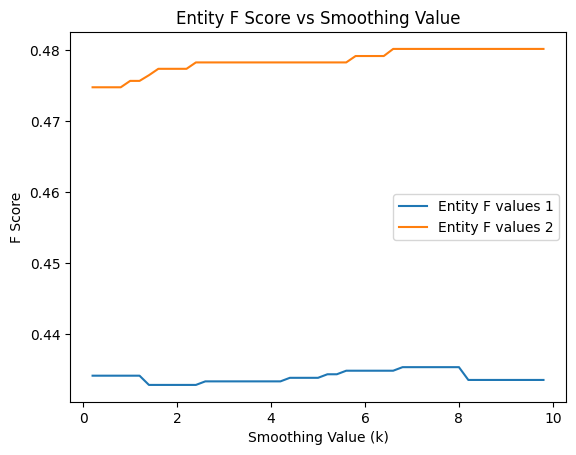

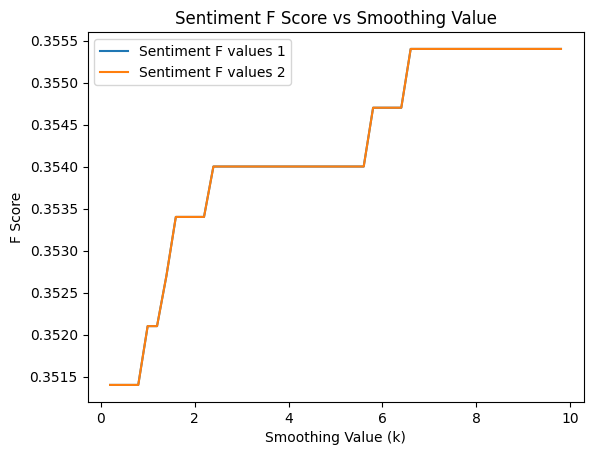

In [681]:
import matplotlib.pyplot as plt
import pandas as pd


# Create a Pandas DataFrame
df = pd.DataFrame({
    'k': smoothings,
    'Entity_F1': entity_f_values,
    'Sentiment_F1': sentiment_f_values,
    'Entity_F2': entity_f_values1,
    'Sentiment_F2': sentiment_f_values1
})

# Plotting Entity F values
plt.plot(df['k'], df['Entity_F1'], label='Entity F values 1')
plt.plot(df['k'], df['Entity_F2'], label='Entity F values 2')
plt.xlabel('Smoothing Value (k)')
plt.ylabel('F Score')
plt.title('Entity F Score vs Smoothing Value')
plt.legend()
plt.show()

# Plotting Sentiment F values
plt.plot(df['k'], df['Sentiment_F1'], label='Sentiment F values 1')
plt.plot(df['k'], df['Sentiment_F2'], label='Sentiment F values 2')
plt.xlabel('Smoothing Value (k)')
plt.ylabel('F Score')
plt.title('Sentiment F Score vs Smoothing Value')
plt.legend()
plt.show()


### THIS IS NEW TEST OUTPUT ###

In [685]:
import subprocess
import os
with open('Data/Test/ES/test.in', 'r', encoding="utf-8") as f:
    testES_devin = f.readlines()
with open('Data/Test/RU/test.in', 'r', encoding="utf-8") as f:
    testRU_devin = f.readlines()
i=7.8
testbest_tags_ES_smooth = sum(viterbi_with_smoothing(testES_devin, ES_train_emission_params,  ES_train_transition_params,i), [])

testbest_tags_RU_smooth = sum(viterbi_with_smoothing(testRU_devin, RU_train_emission_params,  RU_train_transition_params,i), [])

with open('Data/ES/test.p4.out', 'w', encoding="utf-8") as f:
    lines = ['{} {}'.format(word, tag) for word, tag in testbest_tags_ES_smooth[1:]]
    f.write('\n'.join(lines))

with open('Data/RU/test.p4.out', 'w', encoding="utf-8") as f:
    lines = ['{} {}'.format(word, tag) for word, tag in testbest_tags_RU_smooth[1:]]
    f.write('\n'.join(lines))


